In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd    #89, 91, 92
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Preprocessing

In [2]:
dataset=pd.read_csv('nuovo_dataset_totale.csv')

In [3]:
dataset

,Unnamed: 0,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,album_release_date_precision,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,1989,2017-09-22,day,13.0,0.53,0.52,0.0,-9.85,1,0.49,0.55,0.54,0.09,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,[51.0]
1,1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,Kiasmos,2014-10-27,day,8.0,0.75,0.34,5.0,-12.76,0,0.03,0.17,0.65,0.11,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,[47.0]
2,2,56tXgHlSHCfgmGhwVXNizc,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,Night Visions,2018-06-22,day,10.0,0.80,0.64,7.0,-10.68,0,0.10,0.03,0.47,0.07,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,[44.0]
3,3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,day,7.0,0.68,0.54,6.0,-11.98,0,0.06,0.05,0.72,0.11,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,"[36.0, 40.0]"
4,4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,day,13.0,0.76,0.67,11.0,-13.35,0,0.04,0.51,0.92,0.12,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,[45.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109144,109542,0wiDjWz3U1WfwXSrWHXe2b,I'm Good (Blue) - REAPER Extended Remix,1.0,209.66,True,23.0,2.0,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],2022-10-21,day,2.0,0.47,0.98,5.0,-2.67,0,0.08,0.01,0.32,0.36,0.37,173.96,4.0,0.73,1.00,0.09,0.18,145.0,edm,"[86.0, 79.0, 50.0]"
109145,109543,46n9OJc7LOIVdj8t2l5WA5,End Of The Night,1.0,205.72,True,56.0,1.0,Danny Avila,single,End Of The Night,2018-11-16,day,1.0,0.67,0.72,9.0,-4.48,1,0.03,0.37,0.00,0.08,0.31,99.97,4.0,0.71,1.00,0.40,0.54,84.0,edm,[47.0]
109146,109544,127uq83uGFapbddqiMUKky,Sexy Bitch (feat. Akon),1.0,195.85,True,80.0,3.0,David Guetta;Akon,album,One More Love,2010-11-22,day,28.0,0.81,0.63,11.0,-5.02,0,0.05,0.08,0.00,0.13,0.80,130.01,4.0,0.81,0.99,0.10,0.33,106.0,edm,"[86.0, 79.0]"
109147,109545,0ZdUHFxifUJNqo7G4aJzoF,Savannah,1.0,208.70,False,60.0,1.0,Diviners;Philly K.,single,Savannah,2015-11-25,day,1.0,0.65,0.78,0.0,-3.13,1,0.04,0.37,0.00,0.04,0.39,108.07,4.0,0.65,1.00,0.55,0.60,89.0,edm,"[47.0, 38.0]"


In [4]:
import pandas as pd

# Assuming your dataset is in a DataFrame called df

# Define the list of genres
genres_to_filter = ['sertanejo', 'folk', 'j-idol', 'world-music', 'songwriter',
                    'progressive-house', 'heavy-metal', 'mpb', 'opera', 'minimal-techno',
                    'new-age', 'sleep', 'emo', 'kids', 'honky-tonk', 'synth-pop',
                    'goth', 'happy', 'salsa', 'piano']

# Filter the dataset based on the 'genre' column
filtered_df = dataset[dataset['genre'].isin(genres_to_filter)]

# Now, filtered_df contains only the rows where the 'genre' column matches the specified genres


In [5]:
filtered_df

,Unnamed: 0,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,album_release_date_precision,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,1989,2017-09-22,day,13.0,0.53,0.52,0.0,-9.85,1,0.49,0.55,0.54,0.09,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,[51.0]
1,1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,Kiasmos,2014-10-27,day,8.0,0.75,0.34,5.0,-12.76,0,0.03,0.17,0.65,0.11,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,[47.0]
2,2,56tXgHlSHCfgmGhwVXNizc,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,Night Visions,2018-06-22,day,10.0,0.80,0.64,7.0,-10.68,0,0.10,0.03,0.47,0.07,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,[44.0]
3,3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,day,7.0,0.68,0.54,6.0,-11.98,0,0.06,0.05,0.72,0.11,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,"[36.0, 40.0]"
4,4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,day,13.0,0.76,0.67,11.0,-13.35,0,0.04,0.51,0.92,0.12,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,[45.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99492,99890,2jw9uRjSU1yGjMv3YMhbho,Draw A Crowd,1.0,254.35,False,30.0,6.0,Ben Folds Five,album,The Sound Of The Life Of The Mind,2012-09-18,day,10.0,0.72,0.75,2.0,-6.90,0,0.04,0.10,0.00,0.05,0.68,112.21,4.0,0.84,1.00,0.43,0.57,117.0,piano,[43.0]
99493,99891,3np71XMsjRnFTol0XTEgOZ,Father in Heaven,2.0,147.63,False,29.0,8.0,Paul Cardall,album,40 Hymns for Forty Days,2015-04-14,day,40.0,0.20,0.21,3.0,-12.77,1,0.04,0.90,0.89,0.14,0.04,76.49,4.0,0.28,0.11,0.55,0.66,46.0,piano,[48.0]
99494,99892,4VA8Z5k2hd4RkBTlJFPPyd,Baby Lullaby,1.0,188.00,False,30.0,11.0,Piano Peace,album,Baby Lullaby Piano Sleep Music,2017-03-10,day,40.0,0.20,0.01,7.0,-29.80,1,0.05,0.99,0.90,0.08,0.14,69.49,5.0,0.26,0.62,0.85,0.87,78.0,piano,[61.0]
99495,99893,7xJEyMvEa3eeP1fN3E18PI,Young Man's Fancy,1.0,231.58,False,19.0,14.0,George Winston,album,Linus & Lucy - The Music of Vince Guaraldi,1996-09-07,day,16.0,0.43,0.05,7.0,-17.12,0,0.05,0.99,0.95,0.09,0.06,76.22,4.0,0.09,0.82,0.31,0.41,67.0,piano,[47.0]


In [6]:
filtered_df=filtered_df.drop(['id'], axis=1)
# Assuming df is your original DataFrame with a column named "genre"

#y=LabelEncoder().fit_transform(filtered_df["genre"])

# Fit the label encoder on the training labels
label_encoder = LabelEncoder()
label_encoder.fit(filtered_df["genre"])

# Transform the test labels and predictions
y= label_encoder.transform(filtered_df["genre"])

# Funzione per trasformare le stringhe in liste di float
def trasforma_in_lista(lst_str):
    # Rimuovi i caratteri '[' e ']' e splitta la stringa
    lst_str = lst_str.strip('][').split(', ')
    # Utilizza eval per valutare la lista di stringhe e convertirla in una lista di float
    return [float(x) for x in lst_str]

# Applica la funzione a ciascun valore nella colonna
filtered_df['popularity_artist'] = filtered_df['popularity_artist'].apply(trasforma_in_lista)

# Calcola la media di ciascuna lista
filtered_df['popularity_artist'] = round(filtered_df['popularity_artist'].apply(np.mean),2)

X=filtered_df.drop(['name', 'Unnamed: 0', 'artists', 'disc_number','album_type', 'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'album_name', 'genre'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=72, stratify=y)

norm = StandardScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

# Logistic regression

In [41]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear','lbfgs'],  # Optimization algorithm
                                                #in svm abbiamo tenuto linear
    'max_iter': [2000],
    'tol': [0.001, 0.01],
    'dual': [False]
}

# Create logistic regression classifier
logistic_regression = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train_norm, y_train)

# Get the best parameter values
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

c:\Users\corra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\corra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\corra\anaconda3\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\corra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

Best Parameters: {'C': 100, 'dual': False, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001}


In [42]:
print("Best Score:", grid_search.best_score_)

Best Score: 0.5542713066684011


In [43]:
# Create logistic regression classifier
logistic_regression = LogisticRegression(**best_params)
logistic_regression.fit(X_train_norm, y_train)

LogisticRegression(C=100, max_iter=2000, tol=0.001)

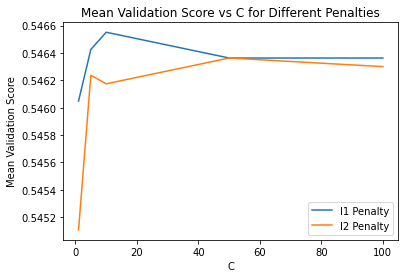

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for both 'l1' and 'l2' penalties
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1, 5, 10, 50, 100],
    'solver': ['liblinear'],  # 'liblinear' supports both 'l1' and 'l2' penalties
    'max_iter': [2000],
    'tol': [0.001],
    'dual': [False]
}

# Create logistic regression classifier
logistic_regression = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train_norm, y_train)

# Extract results for plotting
results = grid_search.cv_results_
C_values = [1, 5, 10, 50, 100]

# Separate mean validation scores for 'l1' and 'l2' penalties
mean_validation_scores_l1 = []
mean_validation_scores_l2 = []

for i in range(len(results['param_penalty'])):
    if results['param_penalty'][i] == 'l1':
        mean_validation_scores_l1.append(results['mean_test_score'][i])
    elif results['param_penalty'][i] == 'l2':
        mean_validation_scores_l2.append(results['mean_test_score'][i])

# Ensure the scores are correctly ordered by C values
mean_validation_scores_l1 = np.array(mean_validation_scores_l1).reshape(-1, len(C_values))
mean_validation_scores_l2 = np.array(mean_validation_scores_l2).reshape(-1, len(C_values))

# Plot the results
plt.plot(C_values, mean_validation_scores_l1[0], label='l1 Penalty')
plt.plot(C_values, mean_validation_scores_l2[0], label='l2 Penalty')
plt.xlabel('C')
plt.ylabel('Mean Validation Score')
plt.title('Mean Validation Score vs C for Different Penalties')
plt.legend()
plt.show()


In [29]:
mean_validation_scores_l2

array([0.54617427, 0.54617427, 0.54617427, 0.54617427])

In [44]:
logistic_regression.score(X_train_norm, y_train)

0.563437755037981

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test_norm)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

# If you used a label encoder to encode the class labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Get the class names
class_names = label_encoder.classes_

# Print the classification report with class names
report = classification_report(y_test_original, y_pred_original, target_names=class_names)
print(report)

report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)


                   precision    recall  f1-score   support

              emo       0.56      0.47      0.51       200
             folk       0.29      0.15      0.20       197
             goth       0.32      0.17      0.23       200
            happy       0.66      0.69      0.68       200
      heavy-metal       0.48      0.66      0.56       200
       honky-tonk       0.65      0.74      0.69       196
           j-idol       0.56      0.65      0.60       200
             kids       0.74      0.77      0.75       198
   minimal-techno       0.81      0.88      0.84       199
              mpb       0.34      0.24      0.28       200
          new-age       0.57      0.59      0.58       199
            opera       0.56      0.55      0.55       198
            piano       0.57      0.39      0.46       200
progressive-house       0.56      0.61      0.58       200
            salsa       0.62      0.74      0.67       199
        sertanejo       0.56      0.72      0.63       

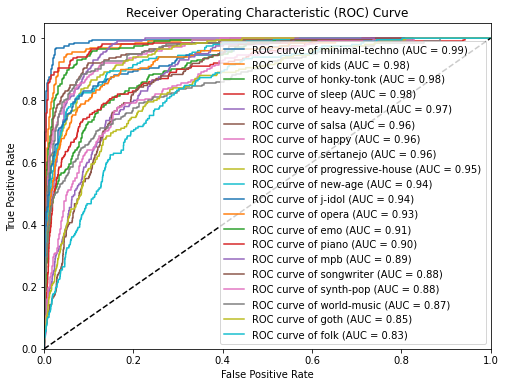

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ottieni le probabilità predette per ogni classe
y_score = logistic_regression.predict_proba(X_test_norm)

# Calculate the ROC curve and AUC for each class
n_classes = len(np.unique(y))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Sort the classes by AUC in descending order
sorted_classes = sorted(roc_auc.items(), key=lambda x: x[1], reverse=True)
# Get the original class names
class_names = label_encoder.inverse_transform(np.unique(y_test))

# Plot the ROC curve for each class in descending order of AUC
plt.figure(figsize=(8, 6))
for i, (class_id, auc_value) in enumerate(sorted_classes):
    plt.plot(fpr[class_id], tpr[class_id], label=f'ROC curve of {class_names[class_id]} (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# MLP (=Neural Network 1+ hid.layers)

In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [48]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)],  # Various hidden layer sizes
    'activation': ['logistic', 'tanh', 'relu'],  # Activation functions
    'solver': ['adam', 'sgd', 'lbfgs'],  # Solvers for optimization
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
    'learning_rate': ['constant', 'adaptive'],
    'momentum': [0.1, 0.01, 0.001],
    'n_iter_no_change': [20, 30],
    'max_iter': [300, 400, 500],
    'early_stopping': [True] # Learning rate schedule
}

# Create MLP classifier
mlp = MLPClassifier()

randomized_search = RandomizedSearchCV(mlp, param_grid, n_iter=30, verbose=1, random_state=42, n_jobs=-1)

randomized_search.fit(X_train_norm, y_train)

# Get the best parameter values
best_params = randomized_search.best_params_
print("Best Parameters:", best_params)
print("Best Score:", randomized_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'solver': 'adam', 'n_iter_no_change': 20, 'momentum': 0.01, 'max_iter': 400, 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 100, 50), 'early_stopping': True, 'alpha': 0.01, 'activation': 'tanh'}
Best Score: 0.6414088126921058


In [49]:
# Create MLP classifier
mlp = MLPClassifier(**best_params)
from sklearn.metrics import classification_report, accuracy_score
mlp.fit(X_train_norm, y_train)


# Make predictions on the test set
y_pred = mlp.predict(X_test_norm)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

# If you used a label encoder to encode the class labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Get the class names
class_names = label_encoder.classes_

# Print the classification report with class names
report = classification_report(y_test_original, y_pred_original, target_names=class_names)
print(report)

report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("TR", mlp.score(X_train_norm, y_train))

                   precision    recall  f1-score   support

              emo       0.60      0.53      0.56       200
             folk       0.32      0.31      0.32       197
             goth       0.40      0.28      0.33       200
            happy       0.76      0.72      0.74       200
      heavy-metal       0.55      0.72      0.62       200
       honky-tonk       0.82      0.84      0.83       196
           j-idol       0.69      0.71      0.70       200
             kids       0.81      0.81      0.81       198
   minimal-techno       0.84      0.88      0.86       199
              mpb       0.46      0.60      0.52       200
          new-age       0.65      0.69      0.67       199
            opera       0.62      0.61      0.61       198
            piano       0.76      0.59      0.66       200
progressive-house       0.65      0.73      0.69       200
            salsa       0.76      0.79      0.77       199
        sertanejo       0.74      0.79      0.76       

In [50]:
print("Accuracy:", accuracy)
print("TR", mlp.score(X_train_norm, y_train))

Accuracy: 0.6477529500376601
TR 0.7272270701236738


Epoch 1/300


448/448 [==============================] - 3s 4ms/step - loss: 1.8875 - accuracy: 0.4519 - val_loss: 1.5645 - val_accuracy: 0.5336
Epoch 2/300
448/448 [==============================] - 1s 3ms/step - loss: 1.5059 - accuracy: 0.5359 - val_loss: 1.4517 - val_accuracy: 0.5549
Epoch 3/300
448/448 [==============================] - 1s 2ms/step - loss: 1.4366 - accuracy: 0.5531 - val_loss: 1.4006 - val_accuracy: 0.5687
Epoch 4/300
448/448 [==============================] - 1s 3ms/step - loss: 1.3983 - accuracy: 0.5628 - val_loss: 1.3740 - val_accuracy: 0.5700
Epoch 5/300
448/448 [==============================] - 1s 3ms/step - loss: 1.3692 - accuracy: 0.5660 - val_loss: 1.3518 - val_accuracy: 0.5712
Epoch 6/300
448/448 [==============================] - 1s 3ms/step - loss: 1.3436 - accuracy: 0.5803 - val_loss: 1.3358 - val_accuracy: 0.5738
Epoch 7/300
448/448 [==============================] - 1s 2ms/step - loss: 1.3188 - accuracy: 0.5852 - val_loss: 1.3023 - val_accuracy: 0.59

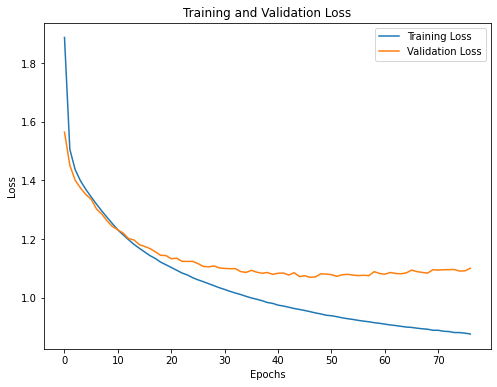

In [16]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.regularizers import l2


# Assuming you have X_train_norm and y_train defined

# One-hot encode the target variables
num_classes = len(np.unique(y_train))
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)

# Further split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_norm, y_train_one_hot, test_size=0.1, random_state=42)

# Define the input shape
input_shape = (X_train.shape[1],)  # Use the second dimension as input_shape


Epoch 1/300
448/448 [==============================] - 2s 3ms/step - loss: 2.1580 - accuracy: 0.4538 - val_loss: 1.8016 - val_accuracy: 0.5242
Epoch 2/300
448/448 [==============================] - 1s 3ms/step - loss: 1.7174 - accuracy: 0.5353 - val_loss: 1.6423 - val_accuracy: 0.5411
Epoch 3/300
448/448 [==============================] - 1s 3ms/step - loss: 1.6252 - accuracy: 0.5401 - val_loss: 1.5899 - val_accuracy: 0.5449
Epoch 4/300
448/448 [==============================] - 1s 3ms/step - loss: 1.5843 - accuracy: 0.5438 - val_loss: 1.5526 - val_accuracy: 0.5537
Epoch 5/300
448/448 [==============================] - 1s 2ms/step - loss: 1.5602 - accuracy: 0.5472 - val_loss: 1.5241 - val_accuracy: 0.5625
Epoch 6/300
448/448 [==============================] - 1s 2ms/step - loss: 1.5433 - accuracy: 0.5497 - val_loss: 1.5094 - val_accuracy: 0.5549
Epoch 7/300
448/448 [==============================] - 1s 2ms/step - loss: 1.5313 - accuracy: 0.5499 - val_loss: 1.5049 - val_accuracy: 0.5543

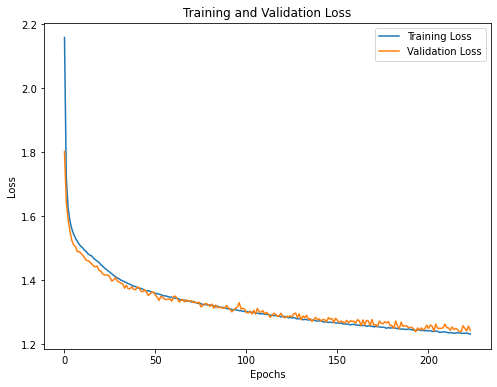

In [24]:
# Create the model
model = Sequential()

# Add the input layer
model.add(Dense(100, input_shape=input_shape, activation='tanh', kernel_regularizer=l2(0.01)))

# Add the output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001, beta_1=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the early stopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Train the model and plot the training and validation loss
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [26]:
#y_test_one_hot = to_categorical(y_test, num_classes=num_classes)
model.evaluate(X_test_norm, y_test_one_hot)


125/125 [==============================] - 0s 2ms/step - loss: 1.2711 - accuracy: 0.6284


[1.2711257934570312, 0.6284207701683044]

c:\Users\corra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\neural_network\_multi

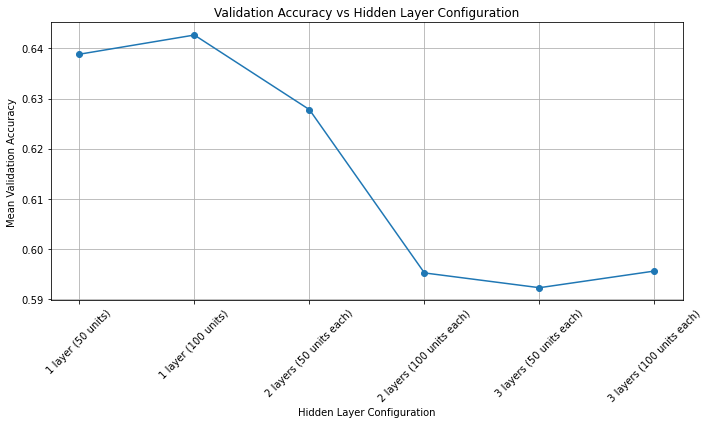

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid for hidden layer sizes
param_grid = {
    'hidden_layer_sizes': [
        (50,),             # 1 hidden layer with 50 units
        (100,),            # 1 hidden layer with 100 units
        (50, 50),          # 2 hidden layers with 50 units each
        (100, 100),        # 2 hidden layers with 100 units each
        (50, 50, 50),
        (100, 100, 100)       # 3 hidden layers with 50 units each
    ],
    'solver': ['adam'],
    'n_iter_no_change': [30],
    'momentum': [0.001],
    'max_iter': [300],
    'learning_rate': ['adaptive'],
    'early_stopping': [False],
    'alpha': [0.0001],
    'activation': ['tanh']
}

# Labels for the configurations
hidden_layer_labels = [
    '1 layer (50 units)',
    '1 layer (100 units)',
    '2 layers (50 units each)',
    '2 layers (100 units each)',
    '3 layers (50 units each)',
    '3 layers (100 units each)'
]

# Create the MLPClassifier
mlp = MLPClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_norm, y_train)

# Extract mean validation scores for each configuration
mean_validation_scores = grid_search.cv_results_['mean_test_score']

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(hidden_layer_labels, mean_validation_scores, marker='o')
plt.xlabel('Hidden Layer Configuration')
plt.ylabel('Mean Validation Accuracy')
plt.title('Validation Accuracy vs Hidden Layer Configuration')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


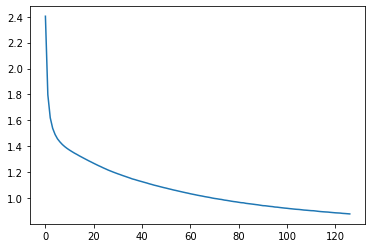

In [32]:
plt.plot(mlp.loss_curve_)
plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_norm, y_train, test_size=0.2, random_state=42)

# Initialize MLPClassifier with the best parameters
mlp = MLPClassifier(**best_params)

# Train MLPClassifier
mlp.fit(X_train, y_train)

# Plot training and validation loss
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.plot(mlp.validation_scores_, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [15929, 12743]

In [14]:
val_loss

[0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.36315128688010045,
 0.3631512

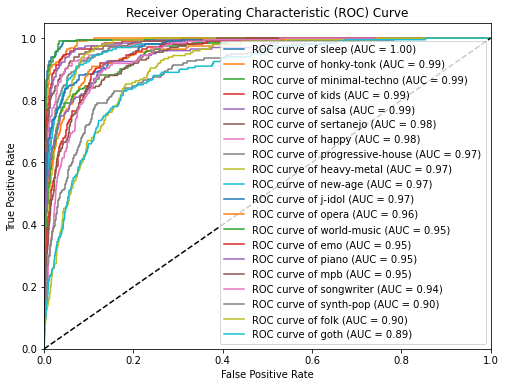

In [51]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
y_score = mlp.predict_proba(X_test_norm)

# Calculate the ROC curve and AUC for each class
n_classes = len(np.unique(y))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Sort the classes by AUC in descending order
sorted_classes = sorted(roc_auc.items(), key=lambda x: x[1], reverse=True)
# Get the original class names
class_names = label_encoder.inverse_transform(np.unique(y_test))

# Plot the ROC curve for each class in descending order of AUC
plt.figure(figsize=(8, 6))
for i, (class_id, auc_value) in enumerate(sorted_classes):
    plt.plot(fpr[class_id], tpr[class_id], label=f'ROC curve of {class_names[class_id]} (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Ensemble learning

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

## Random forests

In [53]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Create Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(X_train_norm, y_train)

# Get the best parameter values
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.6900620749531161


In [17]:
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np
from lime.lime_tabular import LimeTabularExplainer
best_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

random_forest = RandomForestClassifier(**best_params)

random_forest.fit(X_train_norm, y_train)
numeric_df = filtered_df.select_dtypes(include=[np.number])

# Initialize the LIME explainer
explainer = LimeTabularExplainer(X_train_norm, mode='classification', feature_names=numeric_df.columns[:-1], class_names=np.unique(y), discretize_continuous=False)
# Filter test instances belonging to classes 16 and 8
classes_to_explain = [16, 8]
test_instances_to_explain = X_test[np.isin(y_test, classes_to_explain)]
test_labels_to_explain = y_test[np.isin(y_test, classes_to_explain)]

# Explain each instance and print the results
for instance, label in zip(test_instances_to_explain, test_labels_to_explain):
    print(f"Explaining instance with true class {label}: {instance}")
    exp = explainer.explain_instance(instance, random_forest.predict_proba, num_features=10)
    exp.show_in_notebook(show_table=True, show_all=False)
    print("Predicted class:", random_forest.predict([instance])[0])
    print("-" * 80)



Explaining instance with true class 16: duration_ms


AttributeError: 'str' object has no attribute 'shape'

In [16]:
numeric_df.columns

Index(['Unnamed: 0', 'disc_number', 'duration_ms', 'popularity',
       'track_number', 'album_total_tracks', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'tempo_confidence',
       'time_signature_confidence', 'key_confidence', 'mode_confidence',
       'n_bars', 'popularity_artist'],
      dtype='object')

                   precision    recall  f1-score   support

              emo       0.71      0.62      0.66       200
             folk       0.46      0.27      0.34       197
             goth       0.50      0.38      0.43       200
            happy       0.84      0.81      0.83       200
      heavy-metal       0.66      0.77      0.71       200
       honky-tonk       0.84      0.91      0.88       196
           j-idol       0.71      0.78      0.74       200
             kids       0.76      0.89      0.82       198
   minimal-techno       0.82      0.89      0.85       199
              mpb       0.50      0.55      0.52       200
          new-age       0.65      0.66      0.65       199
            opera       0.59      0.63      0.61       198
            piano       0.81      0.63      0.71       200
progressive-house       0.71      0.75      0.73       200
            salsa       0.77      0.86      0.81       199
        sertanejo       0.68      0.78      0.73       

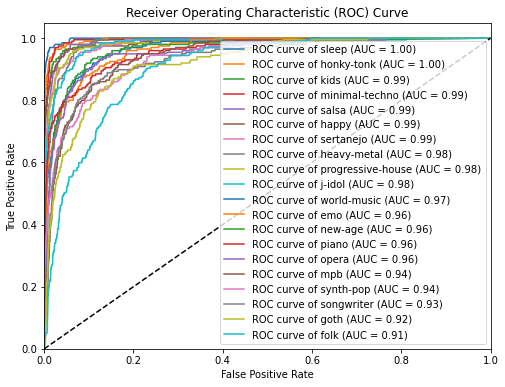

In [14]:
train = random_forest.score(X_train_norm, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test_norm)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

# If you used a label encoder to encode the class labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Get the class names
class_names = label_encoder.classes_

# Print the classification report with class names
report = classification_report(y_test_original, y_pred_original, target_names=class_names)
print(report)

report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("TR Acc:", train)
print("Accuracy:", accuracy)


# Get the predicted probabilities for each class
y_score = random_forest.predict_proba(X_test_norm)

# Calculate the ROC curve and AUC for each class
n_classes = len(np.unique(y))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Sort the classes by AUC in descending order
sorted_classes = sorted(roc_auc.items(), key=lambda x: x[1], reverse=True)

# Get the original class names
class_names = label_encoder.inverse_transform(np.unique(y_test))

# Plot the ROC curve for each class in descending order of AUC
plt.figure(figsize=(8, 6))
for i, (class_id, auc_value) in enumerate(sorted_classes):
    plt.plot(fpr[class_id], tpr[class_id], label=f'ROC curve of {class_names[class_id]} (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

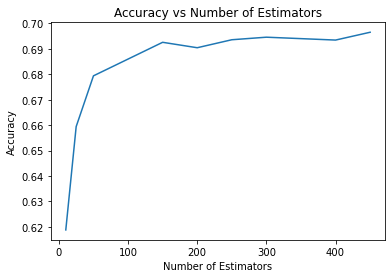

In [22]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter grid
param_grid = {'n_estimators': [10,25,50,100,150,200,250,300,400,450], 
              'max_depth': [20], 
              'min_samples_leaf': [1],
              'min_samples_split': [2]
              }

# Create a list to store accuracy scores
accuracy_scores = []

# Perform grid search with cross-validation
lr = RandomForestClassifier()
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_norm, y_train)

# Extract the results and store accuracy scores
results = grid_search.cv_results_
for mean_score in results['mean_test_score']:
    accuracy_scores.append(mean_score)

# Plot the accuracy scores
plt.plot(param_grid['n_estimators'], accuracy_scores)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()


In [23]:
accuracy_scores

[0.6188085629732119,
 0.6594260801524724,
 0.6793898935787556,
 0.6859816051583606,
 0.6925732181906515,
 0.6904390578482589,
 0.6935780263141037,
 0.6945821446063577,
 0.6934522405224584,
 0.6965284934776461]

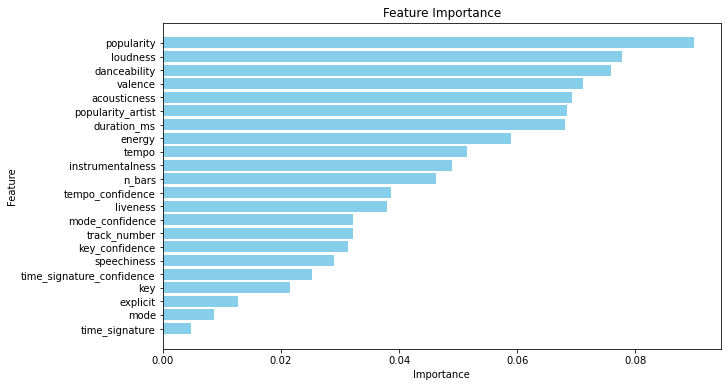

In [56]:
# Get feature importances
feature_importance = random_forest.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the highest importance at the top
plt.show()

In [57]:
from sklearn.dummy import DummyClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a dummy classifier
dummy_clf = DummyClassifier(strategy='most_frequent')

# Train the dummy classifier
dummy_clf.fit(X_train_norm, y_train)

# Make predictions on the test set
y_pred = dummy_clf.predict(X_test_norm)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the dummy classifier: {accuracy:.2f}")


Accuracy of the dummy classifier: 0.05


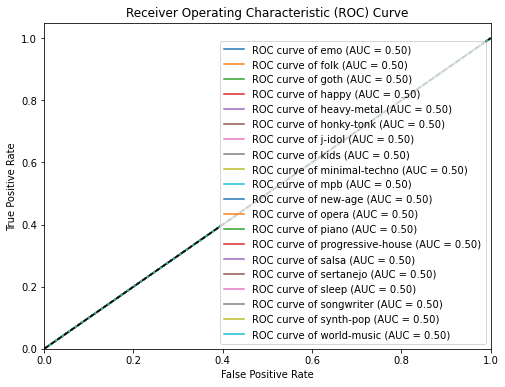

In [59]:
# Get the predicted probabilities for each class
y_score = dummy_clf.predict_proba(X_test_norm)

# Calculate the ROC curve and AUC for each class
n_classes = len(np.unique(y))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Sort the classes by AUC in descending order
sorted_classes = sorted(roc_auc.items(), key=lambda x: x[1], reverse=True)

# Get the original class names
class_names = label_encoder.inverse_transform(np.unique(y_test))

# Plot the ROC curve for each class in descending order of AUC
plt.figure(figsize=(8, 6))
for i, (class_id, auc_value) in enumerate(sorted_classes):
    plt.plot(fpr[class_id], tpr[class_id], label=f'ROC curve of {class_names[class_id]} (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [63]:
report = classification_report(y_test, y_pred, zero_division=0)
print(report)


              precision    recall  f1-score   support

           0       0.05      1.00      0.10       200
           1       0.00      0.00      0.00       197
           2       0.00      0.00      0.00       200
           3       0.00      0.00      0.00       200
           4       0.00      0.00      0.00       200
           5       0.00      0.00      0.00       196
           6       0.00      0.00      0.00       200
           7       0.00      0.00      0.00       198
           8       0.00      0.00      0.00       199
           9       0.00      0.00      0.00       200
          10       0.00      0.00      0.00       199
          11       0.00      0.00      0.00       198
          12       0.00      0.00      0.00       200
          13       0.00      0.00      0.00       200
          14       0.00      0.00      0.00       199
          15       0.00      0.00      0.00       200
          16       0.00      0.00      0.00       200
          17       0.00    

## Adaboost

### Adaboost on LinearSVC  (0.54)

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

model = LinearSVC(C=10, dual=True, max_iter=2000, tol=0.01)

# Create the Boosting Machine model
gbm = AdaBoostClassifier(estimator=model)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Number of diff svm
    'learning_rate': [0.5, 1],  # Learning rate
    'algorithm': ['SAMME']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gbm,
                           param_grid=param_grid,
                           cv=5,
                           verbose=1,  # 5-fold cross-validation
                           scoring='accuracy',  # Evaluation metric
                           )  

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_norm, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 200}
Best Score: 0.4756108997271225


In [11]:
# Create the Boosting Machine model
gbm = AdaBoostClassifier(**best_params, estimator=model)
gbm.fit(X_train_norm, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=LinearSVC(C=10, dual=True, max_iter=2000,
                                       tol=0.01),
                   learning_rate=0.5, n_estimators=200)

In [12]:
# Make predictions on the test set
y_pred = gbm.predict(X_test_norm)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

In [13]:
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined

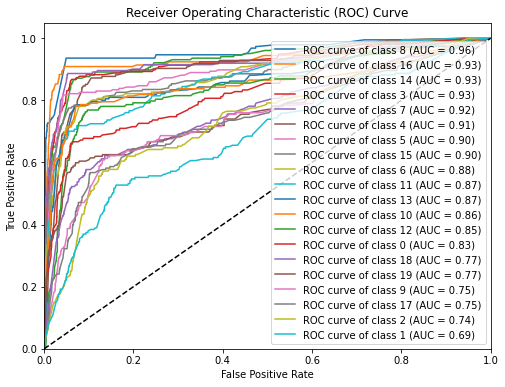

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get the predicted probabilities for each class
y_score = gbm.predict_proba(X_test_norm)

# Calculate the ROC curve and AUC for each class
n_classes = len(np.unique(y))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Sort the classes by AUC in descending order
sorted_classes = sorted(roc_auc.items(), key=lambda x: x[1], reverse=True)

# Plot the ROC curve for each class in descending order of AUC
plt.figure(figsize=(8, 6))
for i, (class_id, auc_value) in enumerate(sorted_classes):
    plt.plot(fpr[class_id], tpr[class_id], label=f'ROC curve of class {class_id} (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [15]:
# Plot feature importance
feature_importance = gbm.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_test.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Adaboost)')
plt.show()


AttributeError: Unable to compute feature importances since estimator does not have a feature_importances_ attribute

### Adaboost - base weak learners

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

weak_learner = DecisionTreeClassifier(max_leaf_nodes=8)


# Create the Gradient Boosting Machine model
gbm = AdaBoostClassifier(estimator=weak_learner)

# Define the parameter grid
param_grid = {
    'n_estimators': [400,500,600],  # Number of trees
    'learning_rate': [0.5, 0.7, 1],  # Learning rate
    'algorithm': ['SAMME']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gbm,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Evaluation metric
                           )  

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_norm, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 600}
Best Score: 0.5891139709541646


In [51]:
# Create the Gradient Boosting Machine model
gbm = AdaBoostClassifier(**best_params, estimator=weak_learner)
gbm.fit(X_train_norm, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_leaf_nodes=8),
                   learning_rate=0.5, n_estimators=600)

In [52]:
# Make predictions on the test set
y_pred = gbm.predict(X_test_norm)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

In [53]:
accuracy

0.6068290233492343

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.47      0.47       186
           1       0.27      0.23      0.25       203
           2       0.45      0.37      0.41       187
           3       0.74      0.74      0.74       196
           4       0.65      0.58      0.61       195
           5       0.91      0.78      0.84       235
           6       0.63      0.70      0.66       196
           7       0.83      0.79      0.81       211
           8       0.79      0.86      0.82       187
           9       0.48      0.49      0.48       204
          10       0.58      0.62      0.60       215
          11       0.46      0.53      0.49       167
          12       0.47      0.51      0.49       173
          13       0.64      0.66      0.65       210
          14       0.75      0.70      0.72       202
          15       0.74      0.75      0.74       218
          16       0.71      0.84      0.77       197
          17       0.46    

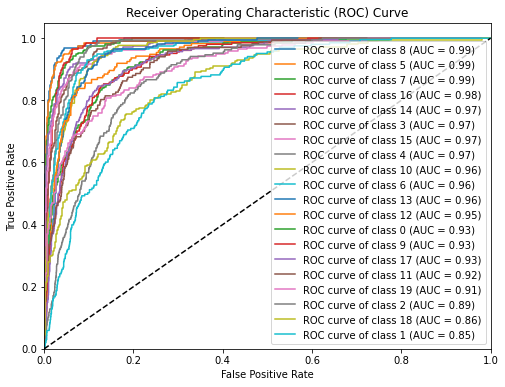

In [55]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get the predicted probabilities for each class
y_score = gbm.predict_proba(X_test_norm)

# Calculate the ROC curve and AUC for each class
n_classes = len(np.unique(y))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Sort the classes by AUC in descending order
sorted_classes = sorted(roc_auc.items(), key=lambda x: x[1], reverse=True)

# Plot the ROC curve for each class in descending order of AUC
plt.figure(figsize=(8, 6))
for i, (class_id, auc_value) in enumerate(sorted_classes):
    plt.plot(fpr[class_id], tpr[class_id], label=f'ROC curve of class {class_id} (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


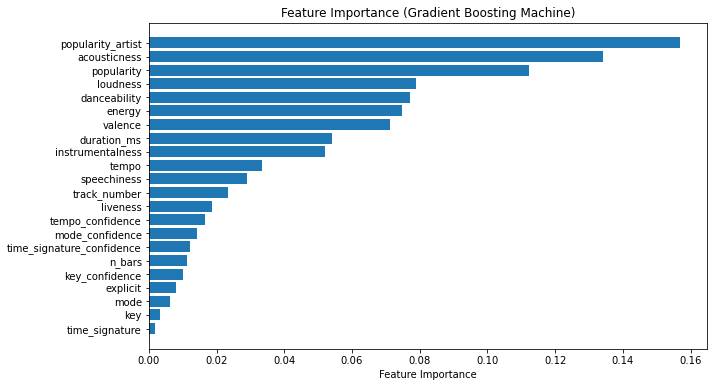

In [56]:
# Plot feature importance
feature_importance = gbm.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_test.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Adaboost)')
plt.show()
